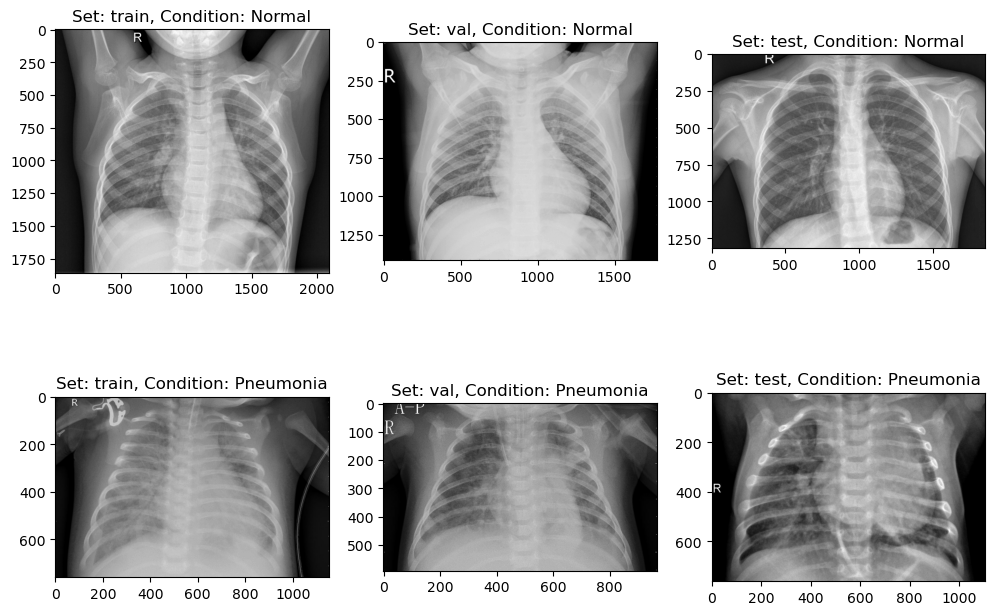

In [3]:
## For Image preprocessing------------
import matplotlib.pyplot as plt
from PIL import Image
import os

# Create a new figure with 6 subplots
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Loop over the subplots and show an example image for each set and condition
image = 'chest_xray/chest_xray/'

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = os.path.join(image, _set)
    img_path = os.path.join(set_path, 'NORMAL', os.listdir(os.path.join(set_path, 'NORMAL'))[0])
    img = Image.open(img_path)
    ax[i//3, i%3].imshow(img, cmap='gray')
    ax[i//3, i%3].set_title('Set: {}, Condition: Normal'.format(_set))
    img_path = os.path.join(set_path, 'PNEUMONIA', os.listdir(os.path.join(set_path, 'PNEUMONIA'))[0])
    img = Image.open(img_path)
    ax[(i+3)//3, (i+3)%3].imshow(img, cmap='gray')
    ax[(i+3)//3, (i+3)%3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

# Show the plot
plt.show()


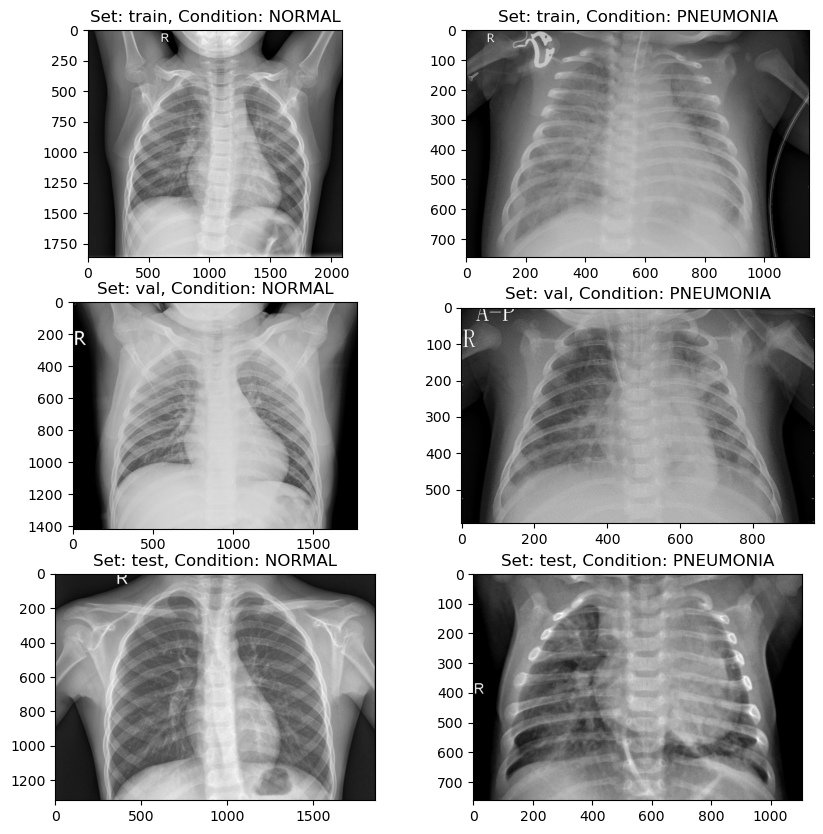

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define paths to input images
input_path = 'chest_xray/chest_xray/'
sets = ['train', 'val', 'test']
conditions = ['NORMAL', 'PNEUMONIA']

# Create a new figure with 6 subplots
fig, ax = plt.subplots(len(sets), len(conditions), figsize=(10, 10))

# Loop over the subplots and show an example image for each set and condition
for i, set_name in enumerate(sets):
    for j, condition_name in enumerate(conditions):
        img_path = os.path.join(input_path, set_name, condition_name, os.listdir(os.path.join(input_path, set_name, condition_name))[0])
        img = Image.open(img_path)
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_title('Set: {}, Condition: {}'.format(set_name, condition_name))

# Show the plot
plt.show()


In [3]:
import cv2
import numpy as np
import os

# define the path to the directory containing the images
path_to_images = "D:/NEUB-Info/Thesis-Project/chest_xray/chest_xray/train"

# define the size to which the images will be resized
size = (128, 128)

# initialize an empty list to store the resized and normalized images
images = []
labels = []

# set batch size
batch_size = 32

# loop through all the images in the directory and resize and normalize them
for foldername in os.listdir(path_to_images):
    folder_path = os.path.join(path_to_images, foldername)
    if foldername == 'NORMAL':
        label = 0
    else:
        label = 1
    for i, filename in enumerate(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, size)
        normalized_img = resized_img / 255.0 # normalize the image
        images.append(normalized_img)
        labels.append(label)
        # process images in batches
        if (i + 1) % batch_size == 0:
            images = np.array(images)
            labels = np.array(labels)
            # process batch of images
            # ...
            # clear lists for next batch
            images = []
            labels = []
    
# process any remaining images
if images:
    images = np.array(images)
    labels = np.array(labels)
    # process batch of images
    # ...


In [4]:
images

array([[[[0.10588235, 0.10588235, 0.10588235],
         [0.09411765, 0.09411765, 0.09411765],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.15686275, 0.15686275, 0.15686275],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.02745098, 0.02745098, 0.02745098]],

        [[0.10980392, 0.10980392, 0.10980392],
         [0.10588235, 0.10588235, 0.10588235],
         [0.10196078, 0.10196078, 0.10196078],
         ...,
         [0.21568627, 0.21568627, 0.21568627],
         [0.17254902, 0.17254902, 0.17254902],
         [0.15294118, 0.15294118, 0.15294118]],

        [[0.11764706, 0.11764706, 0.11764706],
         [0.10980392, 0.10980392, 0.10980392],
         [0.10196078, 0.10196078, 0.10196078],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.10588235, 0.10588235, 0.10588235],
         [0.18823529, 0.18823529, 0.18823529]],

        ...,

        [[0.23137255, 0.23137255, 0.23137255],
         [0.02745098, 0.02745098, 0.02745098]